In [1]:
import pandas as pd

## Load the data

In [2]:
salary = pd.read_csv("SF_Salaries(2017).csv", encoding = "unicode_escape")

C:\Users\chris\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Take a look at the data

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234414 entries, 0 to 234413
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Employee Name         234414 non-null  object 
 1   Job Title             234414 non-null  object 
 2   Base Pay              234414 non-null  object 
 3   Overtime Pay          234414 non-null  object 
 4   Other Pay             234414 non-null  object 
 5   Benefits              234414 non-null  object 
 6   Total Pay             234414 non-null  float64
 7   Total Pay & Benefits  234414 non-null  float64
 8   Year                  234414 non-null  int64  
 9   Notes                 0 non-null       float64
 10  Agency                234414 non-null  object 
 11  Status                119072 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 21.5+ MB


## Function: data cleaning and tidying

In [4]:
def tidyData(data, columns, axis, vals, names):
    #drop useless columns
    data = data.drop(columns, axis = 1)
    #detect the missing data
    missingcounts = data.isnull().sum()
    missingcols = [col for col in missingcounts.keys() if missingcounts[col] != 0]
    #fill the missing data with specific values
    values = dict(zip(missingcols, vals))
    data = data.fillna(value = values)
    #rename the columns
    data.columns = names
    return data

In [5]:
def getMode(values):
    """
    Compute the modes of a list of values
    """
    # if the values is empty, print out warning message
    if len(values) == 0:
        print("there's no value in the list")
    # make a dict for values and the corresponding frequencies
    # solution1
    frequencies = [values.count(item) for item in values]
    dic = dict(zip(values, frequencies)) # zip two lists and convert to dict
    #print(dic)
    # solution2    
    """
    dic = {key: 0 for key in values if len(values) > 0}
    for item in values:
        if item in dic:
            dic[item] += 1
    """
    # make a empty mode list and set max value equal 0
    # run though each pair in dic
    # if the value is larger than the max_value
    # clear the mode and append the mode list with mapping key, as well as set the max_value to value
    # if the value is equal to the max_value
    # append the mode list with mapping key
    mode = []
    max_value = 0
    for key, value in dic.items():
        #print(key,value)
        if value > max_value:
            mode.clear()
            mode.append(key)
            max_value = value
        elif value == max_value:
            mode.append(key)
    return mode

## Function: get the statistics of the column

In [6]:
import statistics as st
import numpy as np
def getStatistics(data, column):
    sals = [sal for sal in data[column]]
    count_sal = len(sals)
    mean_sal = st.mean(sals)
    median_sal = st.median(sals)
    mode_sal = getMode(sals)
    std_sal = st.pstdev(sals)
    sals = sorted(sals)
    min_sal = sorted(sals)[0]
    max_sal = sorted(sals)[-1]
    range_sal = max_sal - min_sal
    q1_sal = np.percentile(sals, 25)
    q2_sal = np.percentile(sals, 50)
    q3_sal = np.percentile(sals, 75)
    sal_list = [count_sal, mean_sal, median_sal, mode_sal, std_sal, min_sal, max_sal, range_sal, q1_sal, q2_sal, q3_sal]
    return sal_list

## Function: get the distribution of the column in data

In [7]:
def getTable(data, column):
    table = data[column].value_counts()
    L = []
    for key in table.keys():
        L.append((key, table[key]))
    return L # return a list of tuples

## Function: print out the table of column

In [8]:
def printTable(L):
    total = 0
    for key, value in L:
        print(key, ":", value)
        total = total + value
    print("total :", total)

## Function: graph a pie chart for the distribution of columns

In [9]:
import matplotlib.pyplot as plt
def graph_pie_chart(title, labels, values):
    print(title)
    df_count_pie = pd.DataFrame({'Class' : labels,'Counts' : values})
    df_count_pie.Counts.groupby(df_count_pie.Class).sum().plot(kind='pie')
    plt.axis('equal')
    plt.show()

## Function: graph a bar chart for the distribution of columns

In [10]:
import seaborn as sns

def graph_bar_chart(title, x_labels, y_label, x_values, y_values, bar_topper):
    """
    Display a bar chart.
    @param title the chart title.
    @param x_labels the labels for the x axis
    @param y_label  the label for the y axis
    @param x_values the x values to plot
    @param y_values the y values to plot
    @param bar_text the text above each bar
    """
    
    sns.set_style('whitegrid')  # white backround with gray grid lines
    axes = sns.barplot(x_values, y_values, palette='bright')
    axes.set_title(title)
    axes.set(xlabel=x_labels, ylabel=y_label)

    # Scale the y-axis by 10% to make room for text above the bars.
    axes.set_ylim(top=1.10*max(y_values))

    # Display the percentage above each patch (bar).
    for bar, topper in zip(axes.patches, bar_topper):
        text_x = bar.get_x() + bar.get_width() / 2.0  
        text_y = bar.get_height() 
        axes.text(text_x, text_y, topper, 
                  fontsize=11, ha='center', va='bottom')

    plt.show()  # display the chart 

## Function: graph a box plot for the distribution of column by another column

In [11]:
def graph_box_plot(data, x_values, y_values):    
    print('Box chart of age ranges by class')
    boxplot = sns.boxplot(y = y_values, x = x_values, data = data)
    plt.show   

In [12]:
salary.head()

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909,13126.3,44430.1,362844.66,407274.78,2012,NaN,San Francisco,NaN
1,Gregory Suhr,Chief of Police,302578.00,0,18974.1,69810.2,321552.11,391362.30,2012,NaN,San Francisco,NaN
2,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415,78057.4,53102.3,336393.73,389496.02,2012,NaN,San Francisco,NaN
3,Joanne Hayes-White,"Chief, Fire Department",296943.01,0,17816.6,72047.9,314759.60,386807.48,2012,NaN,San Francisco,NaN
4,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424,17917.2,44438.2,337204.86,381643.11,2012,NaN,San Francisco,NaN


## Data cleaning and tidying

In [13]:
#drop useless columns
salary = salary.drop(["Notes", "Agency"], axis = 1)
#rename the columns
names = ["EmployeeName", "JobTitle", "BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits", "Year", "Status"]
salary.columns = names
#remove data with negative values
salary = salary[salary.TotalPayBenefits >= 0]
#remove data with part time in status column
salary = salary[salary.Status != 'PT']

In [14]:
salary.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909,13126.3,44430.1,362844.66,407274.78,2012,NaN
1,Gregory Suhr,Chief of Police,302578.00,0,18974.1,69810.2,321552.11,391362.30,2012,NaN
2,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415,78057.4,53102.3,336393.73,389496.02,2012,NaN
3,Joanne Hayes-White,"Chief, Fire Department",296943.01,0,17816.6,72047.9,314759.60,386807.48,2012,NaN
4,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424,17917.2,44438.2,337204.86,381643.11,2012,NaN


In [15]:
salary.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              115336
dtype: int64

In [16]:
values = {"Status": 'FT'}
salary = salary.fillna(value = values)

In [17]:
salary.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Status              0
dtype: int64

## The descriptive statistics of totalpay and totalpaybenefits

In [21]:
totalPay = getStatistics(salary, "TotalPay")
totalPayBenefits = getStatistics(salary, "TotalPayBenefits")

KeyboardInterrupt: 

## 1.1 Histogram of TotalPay

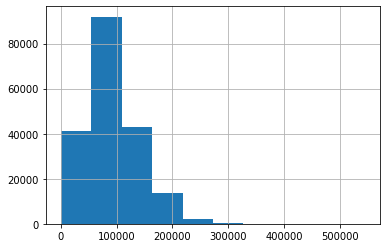

In [19]:
%matplotlib inline
salary.TotalPay.hist()

Figure1.The Histogram shows the salary scattered in different categorizes. The most common level is 90~100 thousand. It is expected value that we calculated before in mean value

## 1.2 The statistics of TotalPay

In [20]:
print(f'count of salaries: {totalPay[0]:8.2f}')
print(f'mean of salaries: {totalPay[1]:10.2f}')
print(f'median of salaries: {totalPay[2]:7.2f}')
print(f'mode of salaries: {totalPay[3]:10.2f}')
print(f'std of salaries: {totalPay[4]:11.2f}')
print(f'min of salaries: {totalPay[5]:11.2f}')
print(f'25% of salaries: {totalPay[8]:11.2f}')
print(f'50% of salaries: {totalPay[9]:11.2f}')
print(f'75% of salaries: {totalPay[10]:11.2f}')
print(f'max of salaries: {totalPay[6]:11.2f}')
print(f'range of salaries: {totalPay[7]:9.2f}')

NameError: name 'totalPay' is not defined

## 2.1 Histogram of TotalPayBenefits

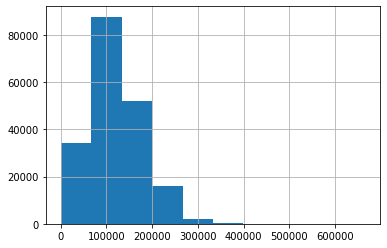

In [22]:
salary.TotalPayBenefits.hist()

## 2.2 The statistics of TotalPayBenefits

In [23]:
print(f'count of salaries: {totalPayBenefits[0]:13.2f}')
print(f'mean of salaries: {totalPayBenefits[1]:14.2f}')
print(f'median of salaries: {totalPayBenefits[2]:12.2f}')
print(f'mode of salaries: {totalPayBenefits[3]:14.2f}')
print(f'std of salaries: {totalPayBenefits[4]:15.2f}')
print(f'min of salaries: {totalPayBenefits[5]:15.2f}')
print(f'25% of salaries: {totalPayBenefits[8]:15.2f}')
print(f'50% of salaries: {totalPayBenefits[9]:15.2f}')
print(f'75% of salaries: {totalPayBenefits[10]:15.2f}')
print(f'max of salaries: {totalPayBenefits[6]:15.2f}')
print(f'range of salaries: {totalPayBenefits[7]:13.2f}')

NameError: name 'totalPayBenefits' is not defined

## 2.3 Why does the minimum value of totalPayBenefits turn out to be negative? 

In [ ]:
salary[salary.TotalPayBenefits == totalPayBenefits[5]]

## The distribution of Year

In [ ]:
yearTable = getTable(salary, "Year")
printTable(yearTable)

In [ ]:
yearLabels = [item[0] for item in yearTable]
yearValues = [item[1] for item in yearTable]
yearToppers = ["336766", "37603", "24167", "25202", "40967", "27301"]
graph_bar_chart("Count of people in year", "Year", "count", yearLabels, yearValues, yearToppers)

## The statistics of salary by year

In [ ]:
salary12 = salary[salary.Year == 2012]
salary13 = salary[salary.Year == 2013]
salary14 = salary[salary.Year == 2014]
salary15 = salary[salary.Year == 2015]
salary16 = salary[salary.Year == 2016]
salary17 = salary[salary.Year == 2017]

In [ ]:
summary12 = getStatistics(salary12, "TotalPayBenefits")
summary13 = getStatistics(salary13, "TotalPayBenefits")
summary14 = getStatistics(salary14, "TotalPayBenefits")
summary15 = getStatistics(salary15, "TotalPayBenefits")
summary16 = getStatistics(salary16, "TotalPayBenefits")
summary17 = getStatistics(salary17, "TotalPayBenefits")
#summary14 = getStatistics(salary14, "TotalPayBenefits")

### 2012

In [ ]:
print(f'count of salaries: {summary12[0]:13.2f}')
print(f'mean of salaries: {summary12[1]:14.2f}')
print(f'median of salaries: {summary12[2]:12.2f}')
print(f'mode of salaries: {summary12[3][0]:14.2f}')
print(f'std of salaries: {summary12[4]:15.2f}')
print(f'min of salaries: {summary12[5]:15.2f}')
print(f'25% of salaries: {summary12[8]:15.2f}')
print(f'50% of salaries: {summary12[9]:15.2f}')
print(f'75% of salaries: {summary12[10]:15.2f}')
print(f'max of salaries: {summary12[6]:15.2f}')
print(f'range of salaries: {summary12[7]:13.2f}')

### 2013

In [ ]:
print(f'count of salaries: {summary13[0]:13.2f}')
print(f'mean of salaries: {summary13[1]:14.2f}')
print(f'median of salaries: {summary13[2]:12.2f}')
print(f'mode of salaries: {summary13[3][0]:14.2f}')
print(f'std of salaries: {summary13[4]:15.2f}')
print(f'min of salaries: {summary13[5]:15.2f}')
print(f'25% of salaries: {summary13[8]:15.2f}')
print(f'50% of salaries: {summary13[9]:15.2f}')
print(f'75% of salaries: {summary13[10]:15.2f}')
print(f'max of salaries: {summary13[6]:15.2f}')
print(f'range of salaries: {summary13[7]:13.2f}')

### 2014

In [ ]:
print(f'count of salaries: {summary14[0]:13.2f}')
print(f'mean of salaries: {summary14[1]:14.2f}')
print(f'median of salaries: {summary14[2]:12.2f}')
print(f'mode of salaries: {summary14[3][0]:14.2f} , {summary14[3][1]:8.2f}')
print(f'std of salaries: {summary14[4]:15.2f}')
print(f'min of salaries: {summary14[5]:15.2f}')
print(f'25% of salaries: {summary14[8]:15.2f}')
print(f'50% of salaries: {summary14[9]:15.2f}')
print(f'75% of salaries: {summary14[10]:15.2f}')
print(f'max of salaries: {summary14[6]:15.2f}')
print(f'range of salaries: {summary14[7]:13.2f}')

### 2015

In [ ]:
print(f'count of salaries: {summary15[0]:13.2f}')
print(f'mean of salaries: {summary15[1]:14.2f}')
print(f'median of salaries: {summary15[2]:12.2f}')
print(f'mode of salaries: {summary15[3][0]:14.2f}')
print(f'std of salaries: {summary15[4]:15.2f}')
print(f'min of salaries: {summary15[5]:15.2f}')
print(f'25% of salaries: {summary15[8]:15.2f}')
print(f'50% of salaries: {summary15[9]:15.2f}')
print(f'75% of salaries: {summary15[10]:15.2f}')
print(f'max of salaries: {summary15[6]:15.2f}')
print(f'range of salaries: {summary15[7]:13.2f}')

### 2016

In [ ]:
print(f'count of salaries: {summary16[0]:13.2f}')
print(f'mean of salaries: {summary16[1]:14.2f}')
print(f'median of salaries: {summary16[2]:12.2f}')
print(f'mode of salaries: {summary16[3][0]:14.2f}')
print(f'std of salaries: {summary16[4]:15.2f}')
print(f'min of salaries: {summary16[5]:15.2f}')
print(f'25% of salaries: {summary16[8]:15.2f}')
print(f'50% of salaries: {summary16[9]:15.2f}')
print(f'75% of salaries: {summary16[10]:15.2f}')
print(f'max of salaries: {summary16[6]:15.2f}')
print(f'range of salaries: {summary16[7]:13.2f}')

### 2017

In [ ]:
print(f'count of salaries: {summary17[0]:13.2f}')
print(f'mean of salaries: {summary17[1]:14.2f}')
print(f'median of salaries: {summary17[2]:12.2f}')
print(f'mode of salaries: {summary17[3][0]:14.2f}')
print(f'std of salaries: {summary17[4]:15.2f}')
print(f'min of salaries: {summary17[5]:15.2f}')
print(f'25% of salaries: {summary17[8]:15.2f}')
print(f'50% of salaries: {summary17[9]:15.2f}')
print(f'75% of salaries: {summary17[10]:15.2f}')
print(f'max of salaries: {summary17[6]:15.2f}')
print(f'range of salaries: {summary17[7]:13.2f}')

## Boxplot of the salary by year

In [ ]:
graph_box_plot(data = salary, y_values = "TotalPayBenefits", x_values ="Year")